In [1]:
import os
from PIL import Image, ImageFile
import math
import copy
import wandb
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation

import torch # PyTorch package
import torchvision # load datasets
import torchvision.transforms as transforms # transform data
from torch.autograd import Variable
import torch.cuda as cuda
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from utils import *


In [2]:
def checkImage(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False
    pass

img_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    ])

non_augmentned = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    ])

gray = transforms.Compose([
    transforms.Grayscale()
    ])

augmentations = {
    'rotation': transforms.Compose([transforms.RandomRotation(degrees=(0,90))]),
    'rotation2': transforms.Compose([transforms.RandomRotation(degrees=(270,360))]),
    'norm': transforms.Compose([transforms.Normalize(mean=[0.34, 0.34, 0.34],std=[0.34, 0.34, 0.34] )]),
    'affine': transforms.Compose([ transforms.RandomAffine(degrees=(0, 90), scale=(0.5, 0.75))]),
    'affine2': transforms.Compose([ transforms.RandomAffine(degrees=(270, 360), scale=(0.5, 0.75))]),
    'blur': transforms.Compose([transforms.GaussianBlur(kernel_size=(7, 15), sigma=(0.1, 3))]),
    'sharpness': transforms.Compose([transforms.RandomAdjustSharpness(40)]),
    'contrast': transforms.Compose([transforms.ColorJitter(contrast=(3,7))]),
}


def imshow(img):
  ''' function to show image '''
  #img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy() # convert to numpy objects
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()


In [3]:
base_dir = './dataset/'
print(os.listdir(base_dir))
for base in os.listdir(base_dir):
    if base == "train":
        train_datasets = []
        for augmentation_name, augmentation_transform in augmentations.items():
            combined_transform = transforms.Compose([img_transforms,augmentation_transform])
            dataset = torchvision.datasets.ImageFolder(
                root=os.path.join(base_dir, base),
                transform=combined_transform,  # Combine main and augmentation transforms
                is_valid_file=checkImage
            )
            train_datasets.append(dataset)

        new_train = torch.utils.data.ConcatDataset(train_datasets)
        
        
    elif base == "val":
        val_datasets = []
        for augmentation_name, augmentation_transform in augmentations.items():
            combined_transform = transforms.Compose([img_transforms,augmentation_transform])
            print(combined_transform)
            dataset = torchvision.datasets.ImageFolder(
                root=os.path.join(base_dir, base),
                transform=combined_transform,  # Combine main and augmentation transforms
                is_valid_file=checkImage
            )
            val_datasets.append(dataset)

        new_val = torch.utils.data.ConcatDataset(val_datasets)
    elif base == "test":
        test_data = torchvision.datasets.ImageFolder(root = os.path.join(base_dir,base), transform = non_augmentned, is_valid_file = checkImage)
        new_test = test_data


['.DS_Store', 'test', 'train', 'val']
Compose(
    Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)
    Compose(
    RandomRotation(degrees=[0.0, 90.0], interpolation=nearest, expand=False, fill=0)
)
)
Compose(
    Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)
    Compose(
    RandomRotation(degrees=[270.0, 360.0], interpolation=nearest, expand=False, fill=0)
)
)
Compose(
    Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)
    Compose(
    Normalize(mean=[0.34, 0.34, 0.34], std=[0.34, 0.34, 0.34])
)
)
Compose(
    Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)
    Compose(
    RandomAffine(degrees=[0.0, 90.0], scale=(0.5, 0.75))
)
)
Compose(
    Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTe

In [4]:
#By default, PyTorch’s data loaders are set to a batch_size of 1.
BATCH_SIZE = 16
train_data_loader = torch.utils.data.DataLoader(new_train, batch_size = BATCH_SIZE,shuffle=False, num_workers=2)
val_data_loader  = torch.utils.data.DataLoader(new_val, batch_size = BATCH_SIZE,shuffle=True, num_workers=2) 
test_data_loader  = torch.utils.data.DataLoader(new_test, batch_size = 128,shuffle=False, num_workers=2)


num_step =math.ceil(len(train_data_loader.dataset) / BATCH_SIZE)

print(type(train_data_loader))


<class 'torch.utils.data.dataloader.DataLoader'>


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
torch.Size([16, 3, 224, 224])


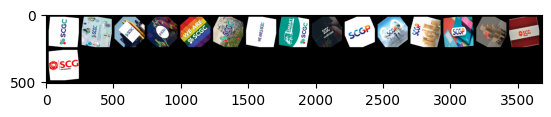

scgc scgc scgc scgc scgc scgc scgc scgc scgc scgp scgp scgp scgp scgp scgp scgp


In [5]:
classes = ('scgc','scgp','wedo')

sample = next(iter(train_data_loader))
imgs, lbls = sample
print(lbls)
print(imgs.shape)

# call function on our images # +29
# imshow(torchvision.utils.make_grid(imgs[26],nrow=15,padding=20))
# imshow(torchvision.utils.make_grid(imgs[59],nrow=15,padding=20))
# imshow(torchvision.utils.make_grid(imgs[92],nrow=15,padding=20))
# imshow(torchvision.utils.make_grid(imgs[125],nrow=15,padding=20))
# imshow(torchvision.utils.make_grid(imgs[158],nrow=15,padding=20))
# imshow(torchvision.utils.make_grid(imgs[191],nrow=15,padding=20))
# imshow(torchvision.utils.make_grid(imgs[224],nrow=15,padding=20))
# imshow(torchvision.utils.make_grid(imgs[257],nrow=15,padding=20))
imshow(torchvision.utils.make_grid(imgs,nrow=15,padding=20))
print(' '.join('%s' % classes[lbls[j]] for j in range(len(imgs))))


In [6]:
from model import *
from torchsummary import summary
net = ResNet(ResidualBlock, [3, 4, 6, 3],num_classes=3)
summary(net, (3, 224, 224))
print(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,160
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,928
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,640
      BatchNorm2d-12          [-1, 256, 56, 56]             512
             ReLU-13          [-1, 256, 56, 56]               0
           Conv2d-14          [-1, 256,

In [7]:
 #wand setup
#"weightname":"S12_3-9_fir8-14"
#name=f"CNN_S12_3-9_fir8-14",
wandb.login()
wand = wandb.init(
      # Set the project where this run will be logged
      project="AR-classification", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"res50_AR_10", 
      # Track hyperparameters and run metadata
      # 0.0000001
      config={
      "learning_rate": 0.0001,
      "architecture": "CNN",
      "dataset": "Organization",
      "epochs": 200,
      "weightname":"res50_10",
      "num_step_per_epoch" : num_step
      }
    )

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: pongkorn-set. Use `wandb login --relogin` to force relogin


In [8]:
config = wand.config
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=config.learning_rate, weight_decay = 0.001, momentum = 0.9)


In [9]:
train_loss,valid_loss,train_accuracy,valid_accuracy =train(
    model = net,
    loader_train = train_data_loader,
    loader_test =test_data_loader,
    vail_loader = val_data_loader,
    optimizer = optimizer  ,
    criterion = criterion ,
    device = 'cuda',
    wand = wand
)


wandb.alert(
            title='Finish',
            text=f'Finishing training',
        )

Epoch 1/200, Tr Loss: 1.0968, Tr Acc: 42.4242, Val Loss: 1.1239, Val Acc: 43.4783
Epoch 11/200, Tr Loss: 0.9326, Tr Acc: 55.6818, Val Loss: 0.9938, Val Acc: 47.8261
Epoch 21/200, Tr Loss: 0.7726, Tr Acc: 67.0455, Val Loss: 1.0724, Val Acc: 52.1739
Epoch 31/200, Tr Loss: 0.6337, Tr Acc: 73.8636, Val Loss: 1.0777, Val Acc: 52.1739
Epoch 41/200, Tr Loss: 0.4256, Tr Acc: 85.2273, Val Loss: 0.8609, Val Acc: 69.5652
Epoch 51/200, Tr Loss: 0.2475, Tr Acc: 94.6970, Val Loss: 0.9769, Val Acc: 78.2609
Epoch 61/200, Tr Loss: 0.1607, Tr Acc: 97.3485, Val Loss: 0.9508, Val Acc: 78.2609
Epoch 71/200, Tr Loss: 0.0888, Tr Acc: 99.2424, Val Loss: 1.1698, Val Acc: 65.2174
Epoch 81/200, Tr Loss: 0.0528, Tr Acc: 99.6212, Val Loss: 1.2017, Val Acc: 73.9130
Epoch 91/200, Tr Loss: 0.0439, Tr Acc: 100.0000, Val Loss: 1.2959, Val Acc: 69.5652
Epoch 101/200, Tr Loss: 0.0327, Tr Acc: 99.6212, Val Loss: 1.7350, Val Acc: 65.2174
Epoch 111/200, Tr Loss: 0.0265, Tr Acc: 100.0000, Val Loss: 1.6153, Val Acc: 69.5652


KeyboardInterrupt: 

In [10]:
PATH = f"./save_weight/res50_10/0.8609_res50_10_0.8609_69.5652.pth"
# # reload
net = ResNet(ResidualBlock, [3, 4, 6, 3])
net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

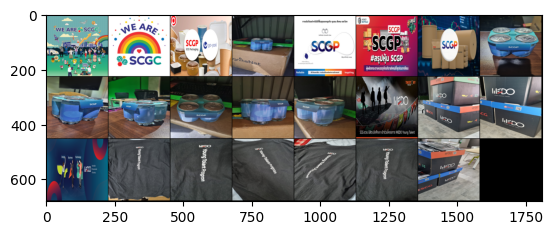

GroundTruth:  scgc scgc scgp scgp scgp scgp scgp scgp scgp scgp scgp scgp scgp wedo wedo wedo wedo wedo wedo wedo wedo wedo wedo
Predicted:  scgc scgc scgp wedo scgp wedo scgc scgc scgp scgc wedo scgp scgc wedo wedo wedo scgc wedo wedo wedo wedo wedo scgc


In [11]:
classes = ('scgc','scgp','wedo')
sample = next(iter(test_data_loader))
imgs, lbls = sample

# print images
imshow(torchvision.utils.make_grid(imgs))
print('GroundTruth: ', ' '.join('%s' % classes[lbls[j]] for j in  range(len(imgs))))

outputs = net(imgs)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%s' % classes[predicted[j]]
                              for j in range(len(imgs))))

tensor([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
tensor([0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0])
23
14


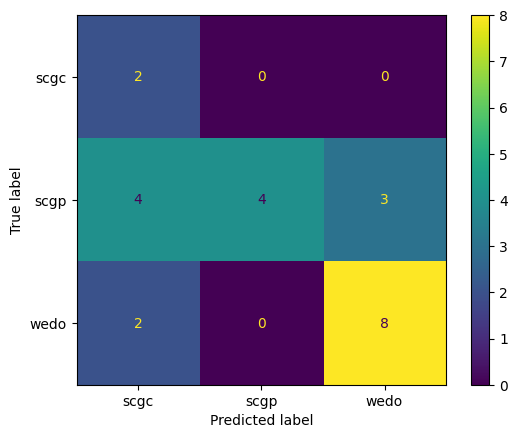

Accuracy of the network on the test images: 60 %


In [14]:
from sklearn import metrics
correct = 0
total = 0
with torch.no_grad():
    for data in test_data_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print(labels)
        print(predicted)
        
        print(total)
        print(correct)

confusion_matrix = metrics.confusion_matrix(labels, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['scgc','scgp','wedo'])

cm_display.plot()
plt.show()
print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))